# Hierarchical Clustering: A Deep Dive

This notebook provides a comprehensive explanation of hierarchical clustering, including theory, types, distance metrics, linkage methods, dendrograms, and practical examples with Python code and visualizations.

## 1. Import Required Libraries
We will use NumPy, pandas, matplotlib, seaborn, and scipy for hierarchical clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Set style for plots
sns.set(style='whitegrid')

## 2. Load and Explore the Dataset
We will use the famous Iris dataset for demonstration. Let's load the data and perform basic exploratory data analysis.

In [2]:
from sklearn.datasets import load_iris

# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Basic EDA
print('Shape:', df.shape)
df.describe()

Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


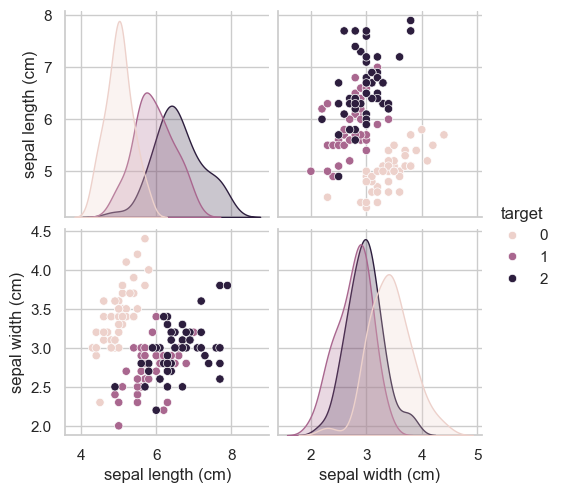

In [4]:
# Visualize pairplot for first two features
sns.pairplot(df, vars=df.columns[:2], hue='target')
plt.show()

## 3. Preprocess the Data
For clustering, we will use only the feature columns and standardize them to have zero mean and unit variance.

In [5]:
from sklearn.preprocessing import StandardScaler

# Select features and standardize
df_features = df.iloc[:, :4]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Check for missing values
print('Missing values:', df_features.isnull().sum().sum())

Missing values: 0


## 4. Compute Distance Matrix
Hierarchical clustering is based on the distance (similarity) between data points. Let's compute the pairwise distance matrix.

In [6]:
# Compute pairwise distance matrix
pairwise_dist = pdist(X_scaled, metric='euclidean')
pairwise_dist[:10]  # Show first 10 distances

array([1.17621868, 0.84560741, 1.10368502, 0.26013882, 1.03844415,
       0.66133116, 0.2662756 , 1.62082104, 0.96287744, 0.58934504])

## 5. Perform Hierarchical Clustering
We will use different linkage methods: single, complete, average, and ward. Let's see how the linkage matrix is computed.

In [7]:
# Compute linkage matrices for different methods
linkage_methods = ['single', 'complete', 'average', 'ward']
linkages = {method: linkage(X_scaled, method=method) for method in linkage_methods}

# Show first 5 rows of the 'ward' linkage matrix
linkages['ward'][:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00]])

## 6. Visualize Dendrogram
A dendrogram is a tree-like diagram that records the sequences of merges or splits. Let's plot dendrograms for different linkage methods.

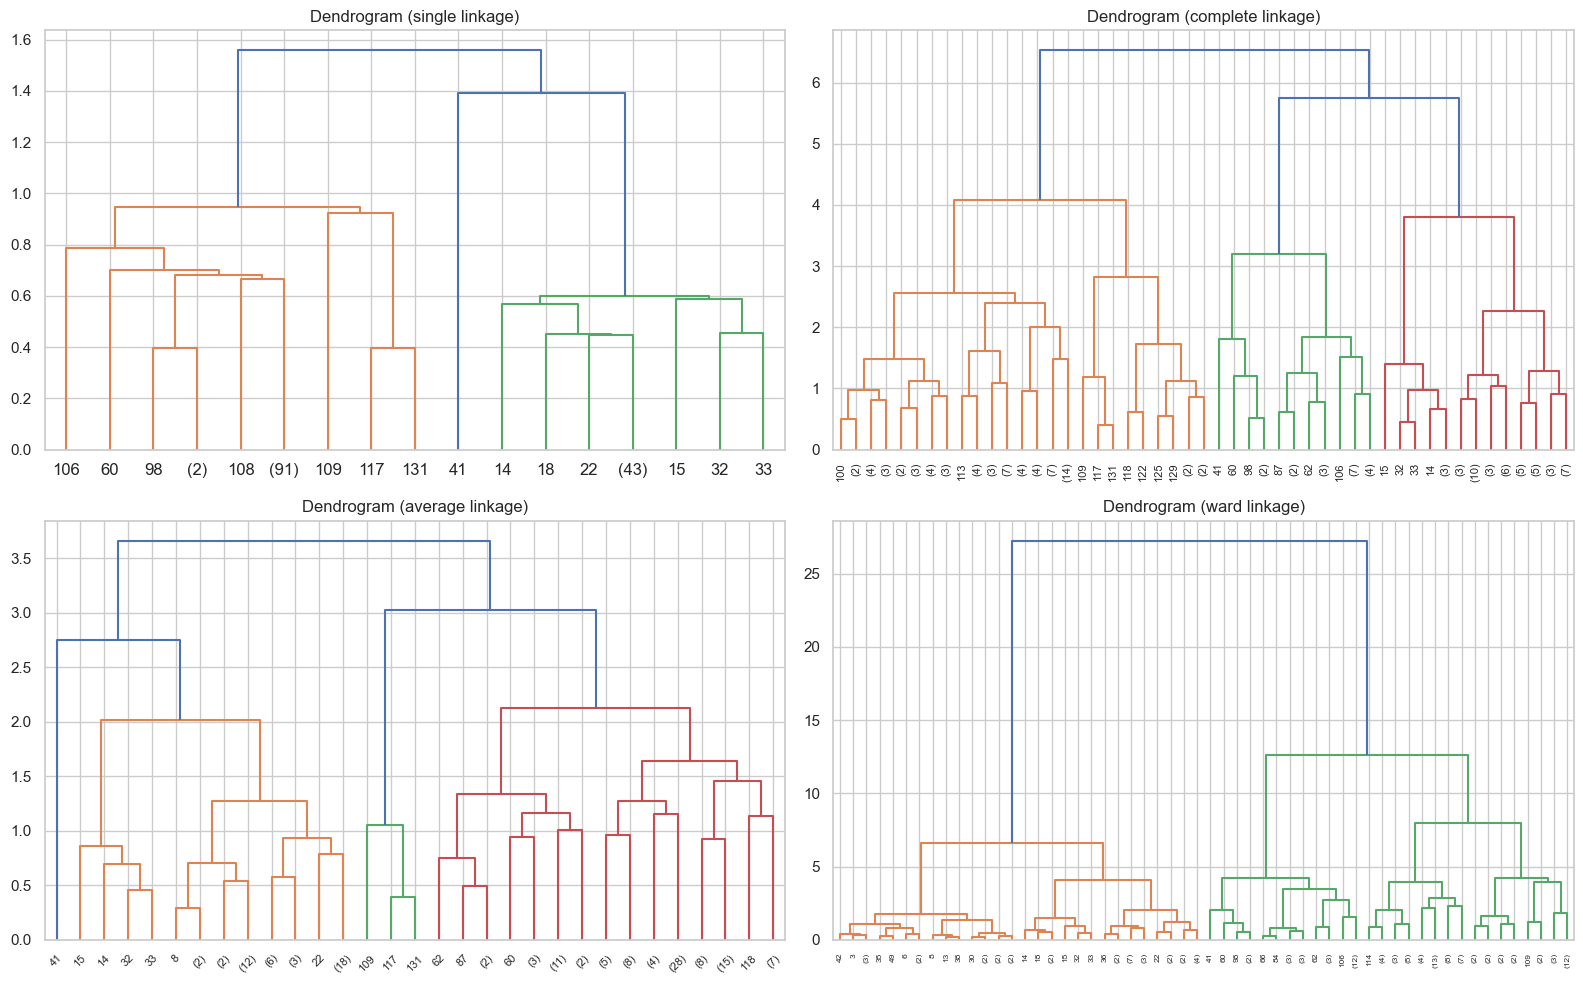

In [8]:
# Plot dendrograms for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for ax, method in zip(axes.flat, linkage_methods):
    dendrogram(linkages[method], ax=ax, truncate_mode='level', p=5)
    ax.set_title(f'Dendrogram ({method} linkage)')
plt.tight_layout()
plt.show()

## 7. Determine Optimal Number of Clusters
We can use the dendrogram to decide the optimal number of clusters by drawing a horizontal line and counting the number of vertical lines it crosses.

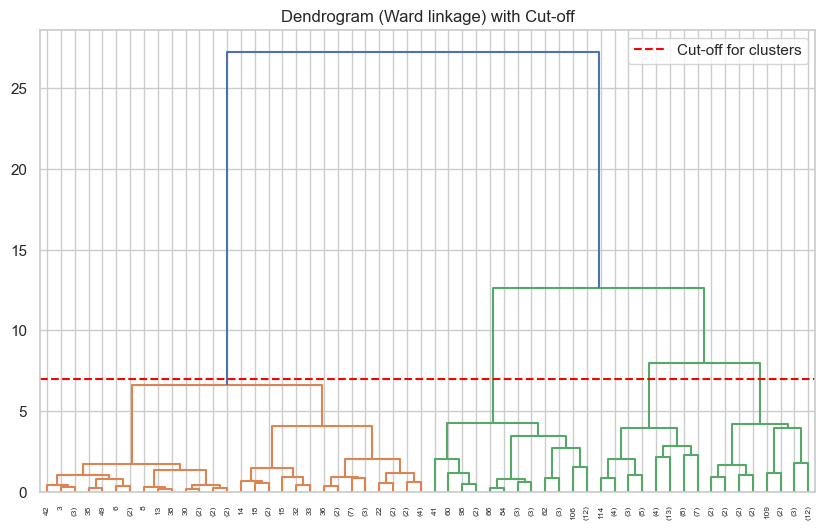

In [9]:
# Plot dendrogram with cut-off line for 'ward' linkage
plt.figure(figsize=(10, 6))
dendrogram(linkages['ward'], truncate_mode='level', p=5)
plt.axhline(y=7, c='red', linestyle='--', label='Cut-off for clusters')
plt.title('Dendrogram (Ward linkage) with Cut-off')
plt.legend()
plt.show()

## 8. Assign Cluster Labels
We can assign cluster labels to each data point using the `fcluster` function from scipy.

In [10]:
# Assign cluster labels (e.g., 3 clusters)
num_clusters = 3
cluster_labels = fcluster(linkages['ward'], num_clusters, criterion='maxclust')
df['cluster'] = cluster_labels
df[['cluster']].head()

,cluster
0,1
1,1
2,1
3,1
4,1


## 9. Visualize Clustered Data
Let's visualize the clustered data in 2D using a scatter plot, coloring points by their assigned cluster labels.

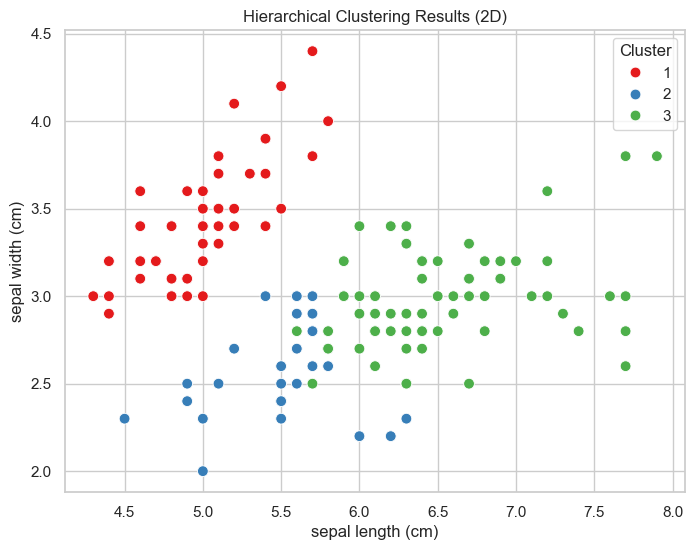

In [11]:
# 2D scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'], palette='Set1', s=60)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Hierarchical Clustering Results (2D)')
plt.legend(title='Cluster')
plt.show()

---

## Summary
- Hierarchical clustering builds a hierarchy of clusters using distance metrics and linkage methods.
- Dendrograms help visualize the merging process and decide the number of clusters.
- The method is flexible and does not require specifying the number of clusters in advance.

You can experiment with different datasets, distance metrics, and linkage methods for further exploration.